In [1]:
from block_ai.lib.myblokus import point
from block_ai.lib.myblokus.game_engine import GameEngine
from block_ai.lib.myblokus.game import Game
from block_ai.lib.myblokus.point import Point
from block_ai.lib.myblokus.piece import Piece
from block_ai.lib.myblokus.corner import Corner
from block_ai.lib.myblokus.orientation import Orientation
from block_ai.lib.myblokus.move import Move

import itertools
import numpy as np
import random

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.patches as patches

%load_ext line_profiler

import logging
from copy import deepcopy

logger = logging.getLogger()
logger.setLevel(logging.WARNING)

In [2]:
def get_avg_moves_per_game():
    
    products = []

    for i in range(100):

        if i > 0 and i % 10 == 0:
            print(i)

        product = get_moves_per_game()
        products.append(product)
        
def get_moves_per_game():
    ge = GameEngine()
    move_counts = []
    while True:
        try:
            player_id = ge.game.player_pointer
            moves = list(ge.game.get_players_moves(player_id))
            move_counts.append((player_id, len(moves)))
            ge.play_turn()

        except GameEnd:
            break

    ids, options = zip(*move_counts)
    options = [float(o) for o in options]
    product = np.product(options)
    return product

In [3]:
ge = GameEngine(True)

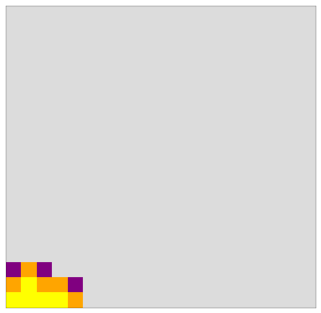

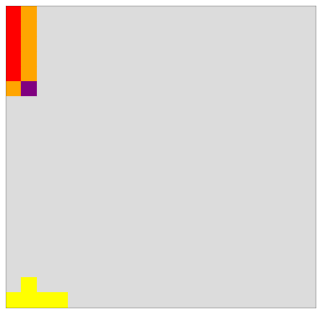

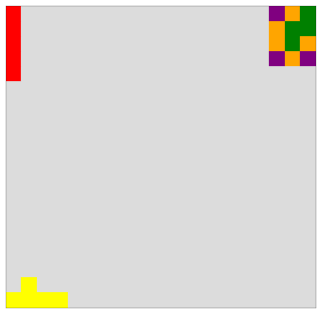

Please Pick a piece from one of the following:
p1
p2
p3
p4
p5
p6
p7
p8
p9
p10
p11
p12
p13
p14
p15
p16
p17
p18
p19
p20
p21: p20


AttributeError: 'Move' object has no attribute 'p2'

In [4]:
ge.play_game()

In [ ]:
ge.game.get_scores()

In [ ]:
ge.game.display()

In [ ]:
logger.setLevel(logging.WARNING)

game = Game()

for m in moves[:47]:
    game.make_move(m)


In [ ]:
logger.setLevel(logging.INFO)

In [ ]:
game.is_move_valid(moves[47])

In [ ]:
game.display()

In [ ]:
bad_move = ge.game.move_history[47]

In [ ]:
for m in game_copy.get_players_moves(3):
    print(m)
    game_copy = deepcopy(game)
    game_copy.make_move(m)
    game_copy.display(m.player_id)

In [ ]:
m = ge.game.move_history[47]

is_move_valid()

In [ ]:
game.display(3)

In [ ]:
logger.setLevel(logging.DEBUG)

In [ ]:
game.make_move(ge.game.move_history[36])

In [ ]:
game.display(3)

In [ ]:
game.get_valid_moves()

In [ ]:
moves = list(game.get_players_moves(3))

vals = set()

for i, move in enumerate(moves):
    val = tuple(move.get_footprint())
    vals.add(val)

In [ ]:
len(moves)

In [ ]:
for move in moves:
    g = deepcopy(game)
    g.make_move(move)

In [ ]:
def test():
    g = deepcopy(game)

In [ ]:
%lprun 

%lprun -f deepcopy test()

In [ ]:
len(moves)

50% of get corner moves involves rotating points. Are matracies faster?

Nagging Ideas:
     -  I should set the seeds for random players to or replay a game based on move history
        so that the runtimes are the same
    
     -  write tests so I don't break anything making optimizations

     -  Speed up BoardViewer 

Optimization Ideas:
     - lots of runtime spend rotating points. Are np.arrays / rot methods faster?
     
     - a bunch of time is spent converting orientations to sets in player.validate_move
         - raise try / catch is pretty expensive though it's nice to have reason why move is invalid
         - could use a boolean check + explain menthod (a little ugly)
  
     - logging can slow down stuff remove ones from the inner most loops

Fixed Logging

File: <ipython-input-74-8f1a337fe857>
Function: add_corner_moves at line 45

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
    45                                               def add_corner_moves(self, corner, player_id):
    46       336        358.0      1.1      0.0          player = self.players[player_id]
    47       336       3075.0      9.2      0.2          rotation = corner.get_rotation()
    48                                                   
    49       336        946.0      2.8      0.1          if not Board.on_board(corner.p2):
    50        45        159.0      3.5      0.0              logging.info("Corner %s is off board", corner)
    51        45         18.0      0.4      0.0              return
    52                                                   
    53       291       1214.0      4.2      0.1          logging.info("Adding corner %s moves", corner)
    54      4006       2874.0      0.7      0.2          for piece_id, piece in player.pieces.items():
    55                                                       
    56     20724      13778.0      0.7      0.8              for orientation in piece.orientations:
    57     17009      50509.0      3.0      3.0                  logging.debug("Examining orientation: %s", orientation)
    58                                                           
    59     17009     882254.0     51.9     52.7                  new_o = Orientation([corner.p2 + rotation(p) for p in orientation.points])
    60     17009      59013.0      3.5      3.5                  logging.debug("New orientation: %s", new_o)
    61     17009      33927.0      2.0      2.0                  m = Move(new_o, player_id, piece_id, corner)
    62                                           
    63     17009     567201.0     33.3     33.9                  if self.is_move_valid(m):
    64      6450      21146.0      3.3      1.3                      logging.debug("Adding Move: %s", m)
    65      6450      36560.0      5.7      2.2                      player.add_move(m)

Timer unit: 1e-06 s

Total time: 1.43679 s
File: <ipython-input-54-6bf5e323533c>
Function: add_corner_moves at line 45

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
    45                                               def add_corner_moves(self, corner, player_id):
    46       354        281.0      0.8      0.0          player = self.players[player_id]
    47       354       2668.0      7.5      0.2          rotation = corner.get_rotation()
    48                                                   
    49       354        796.0      2.2      0.1          if not Board.on_board(corner.p2):
    50        41        127.0      3.1      0.0              logging.info("Corner %s is off board", corner)
    51        41         19.0      0.5      0.0              return
    52                                                   
    53       313       1007.0      3.2      0.1          logging.info("Adding corner %s moves", corner)
    54      4174       2446.0      0.6      0.2          for piece_id, piece in player.pieces.items():
    55                                                       
    56     20946      10877.0      0.5      0.8              for orientation in piece.orientations:
    57     17085      43595.0      2.6      3.0                  logging.debug("Examining orientation: %s", orientation)
    58                                                           
    59     17085     716453.0     41.9     49.9                  new_o = Orientation([corner.p2 + rotation(p) for p in orientation.points])
    60     17085      46508.0      2.7      3.2                  logging.debug("New orientation: %s", new_o)
    61     17085      49656.0      2.9      3.5                  m = Move(new_o, player_id, piece_id, corner)
    62                                           
    63     17085     454759.0     26.6     31.7                  if self.is_move_valid(m):
    64      6220      78904.0     12.7      5.5                      logging.debug("Adding Move: %s", indent(m, 1))
    65      6220      28691.0      4.6      2.0                      player.add_move(m)

Timer unit: 1e-06 s

Total time: 1.43679 s
File: <ipython-input-54-6bf5e323533c>
Function: add_corner_moves at line 45

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
    45                                               def add_corner_moves(self, corner, player_id):
    46       354        281.0      0.8      0.0          player = self.players[player_id]
    47       354       2668.0      7.5      0.2          rotation = corner.get_rotation()
    48                                                   
    49       354        796.0      2.2      0.1          if not Board.on_board(corner.p2):
    50        41        127.0      3.1      0.0              logging.info("Corner %s is off board", corner)
    51        41         19.0      0.5      0.0              return
    52                                                   
    53       313       1007.0      3.2      0.1          logging.info("Adding corner %s moves", corner)
    54      4174       2446.0      0.6      0.2          for piece_id, piece in player.pieces.items():
    55                                                       
    56     20946      10877.0      0.5      0.8              for orientation in piece.orientations:
    57     17085      43595.0      2.6      3.0                  logging.debug("Examining orientation: %s", orientation)
    58                                                           
    59     17085     716453.0     41.9     49.9                  new_o = Orientation([corner.p2 + rotation(p) for p in orientation.points])
    60     17085      46508.0      2.7      3.2                  logging.debug("New orientation: %s", new_o)
    61     17085      49656.0      2.9      3.5                  m = Move(new_o, player_id, piece_id, corner)
    62                                           
    63     17085     454759.0     26.6     31.7                  if self.is_move_valid(m):
    64      6220      78904.0     12.7      5.5                      logging.debug("Adding Move: %s", indent(m, 1))
    65      6220      28691.0      4.6      2.0                      player.add_move(m)

In [ ]:
ge = GameEngine(display=False)

%lprun -f ge.game.add_corner_moves ge.play_game()
ge.play_game()

In [ ]:
ge = GameEngine(display=False)

%lprun -f GameEngine.play_game ge.play_game()
ge.play_game()

```Third Run
Changed to set intersection instead itterative check almost the same time requirement```

Total time: 0.526981 s
File: <ipython-input-53-8fbb860b920e>
Function: validate_move at line 72

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
    72                                               def validate_move(self, move):
    73     72684      72960.0      1.0     13.8          if not self.has_piece(move.piece_id):
    74      1540      17668.0     11.5      3.4              raise RuntimeError(f"Move {move} invalid. Already played {move.piece_id}")
    75                                           
    76     71144     350042.0      4.9     66.4          new_points = {move.orientation.points}
    77     71144      49508.0      0.7      9.4          overlap = self.invalid_points.intersection(new_points)
    78     71144      36803.0      0.5      7.0          if len(overlap) > 0:
    79                                                       raise RuntimeError(f"Move {move} invalid. Includes invalid point {p}")

```Second Run
Used set instead list to hold invalid points```

Total time: 0.526422 s
File: <ipython-input-44-b012ab35adb8>
Function: validate_move at line 72

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
    72                                               def validate_move(self, move):
    73     48991      56822.0      1.2     10.8          if not self.has_piece(move.piece_id):
    74       833       9379.0     11.3      1.8              raise RuntimeError(f"Move {move} invalid. Already played {move.piece_id}")
    75                                           
    76    247885      96865.0      0.4     18.4          for p in move.orientation.points:
    77    204076     302546.0      1.5     57.5              if p in self.invalid_points:
    78      4349      60810.0     14.0     11.6                  raise RuntimeError(f"Move {move} invalid. Includes invalid point {p}")

```First Run```

Timer unit: 1e-06 s

Total time: 8.30674 s
File: <ipython-input-7-e9cda3e2ec9f>
Function: validate_move at line 72

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
    72                                               def validate_move(self, move):
    73     48443      74686.0      1.5      0.9          if not self.has_piece(move.piece_id):
    74       715      13962.0     19.5      0.2              raise RuntimeError(f"Move {move} invalid. Already played {move.piece_id}")
    75                                           
    76    239866     157205.0      0.7      1.9          for p in move.orientation.points:
    77    196660    7988919.0     40.6     96.2              if p in self.invalid_points:
    78      4522      71967.0     15.9      0.9                  raise RuntimeError(f"Move {move} invalid. Includes invalid point {p}")

## Status
Refactored but a bunch of cornsers get droped for no reason near the end

#### Questions:

why does it allow invalid moves in the below loop?

Theres an average branching factor of around 25
so call it 75 is that doable?





Number of chess game one guy says with 40 avg moves avg 30 moves per game
~ 10 ** 120 

James Hardy says (10 ** 50) ** 50 

Number of blockus game???

according to the game engine there are ~10^140 move options